In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
## fish_target = [1] * 35 + [0] * 14

import numpy as np
##input_arr = np.array(fish_data)
## target_arr = np.array(fish_target)

## 빙어와 도미의 데이터를 합침
fish_data = np.column_stack((fish_length, fish_weight))

## 정답 데이터 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 훈련용과 테스트용 타겟 분리
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

## 분리된 데이터 학습
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

## 예측
print(kn.predict([[25, 150]]))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
## 예측 데이터와 가까운 점들을 찾아줌
distance, indexes = kn.kneighbors([[25, 150]])
print(distance)
print(indexes)

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
## 가장 가까운 점들 표시
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
'''
[25, 150]을 빙어로 판단
왜? 위 그래프에서는 길이와 무게의 스케일이 달라 착각을 일으키기 때문
'''
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
## 가장 가까운 점들 표시
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
## x축 길이 지정
plt.xlim((0, 1000))
plt.ylabel('weight')
plt.show()

In [ ]:
'''
표준 점수: 특정 그룹의 값이 다른 그룹에 비해 낮을 때 낮은 그룹에 가중치를 부여해 분포를 균등하게 하는 것
'''
## inplace = 원본 변경 여부(판다스 공통)
import pandas as pd
import numpy as np
data1 = [['0번', 60, '국어'], 
        ['0번', 70, '영어'], 
        ['0번', 80, '수학'], 
        ['0번', 92, '한국사']]

## 데이터프레임 생성
df1 = pd.DataFrame(data1, columns=["이름", "점수", "과목"])

data2 = [['1번', 78, '국어'], 
        ['1번', 53, '영어'], 
        ['1번', 99, '수학'], 
        ['1번', 86, '한국사']]
df2 = pd.DataFrame(data2, columns=["이름", "점수", "과목"])

## 데이터 병합(대신 열의 이름이 같아야 함)
df3 = pd.concat([df1, df2])


'''
표준 점수 공식 = (원점수 - 평균점수) / 표준편차
표준편차 = sqrt(분산) = sqrt(∑((각 값 - 평균)^2) / (값 개수))
표준편차가 클 수록 값이 넓게 분포되어 있음을 의미
'''

## 데이터 정렬
result = df3.sort_values(by = ['점수'], ascending=True)
## 정렬된 데이터의 기존 인덱스를 버릴것인지
result.reset_index(drop=True, inplace=True)
print(result)

## 평균 구하기
## np.float64 자료형으로 반환
print(df3['점수'].mean())
## 분산 구하기
print(df3['점수'].var())
## 표준편차 구하기
print(df3['점수'].std())


## 표준점수 구하기
df1['표점'] = (df1['점수'] - df1['점수'].mean()) / df1['점수'].std()
df2['표점'] = (df2['점수'] - df2['점수'].mean()) / df2['점수'].std()
df4 = pd.concat([df1, df2])
stdScoreTest = df4.sort_values(by = ['점수'], ascending=False)
stdScoreTest.reset_index(drop = True, inplace = True)
print(stdScoreTest)


input means: [ 27.29722222 454.09722222]
input standard deviation(std): [  9.98244253 323.29893931]
distance from index 21 is 0.28737369803947493
distance from index 14 is 0.7711187994338078
distance from index 34 is 0.8955217862594752
distance from index 32 is 0.9149351521441698
distance from index 5 is 0.9542762595460272


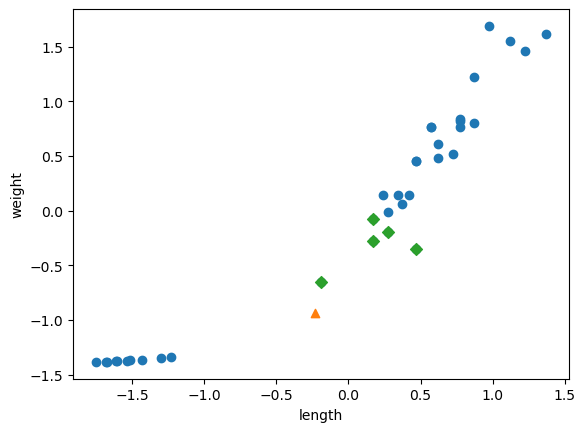

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

## 훈련용과 테스트용 타겟 분리
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, stratify=fish_target)

## np를 이용한 평균
mean = np.mean(train_input, axis = 0)
print(f"input means: {mean}")

## np를 이용한 표준편차 구하기
std = np.std(train_input, axis = 0)
print(f"input standard deviation(std): {std}")

## 훈련용 자료에 표준점수 적용
trainScaledData = (train_input - mean) / std
testScaledData = (test_input - mean) / std

## 학습
kn = KNeighborsClassifier()
kn.fit(trainScaledData, train_target)
kn.score(testScaledData, test_target)

## 예측
newPredicts = ([25, 150] - mean) / std


## 예측값과 가까운 점들 찾음
distances, indexes = kn.kneighbors([newPredicts])
for dist, index in zip(distances[0], indexes[0]):
    print(f"distance from index {index} is {dist}")

## 그래프로 출력
plt.scatter(trainScaledData[:,0], trainScaledData[:,1])
plt.scatter(newPredicts[0], newPredicts[1], marker='^')
plt.scatter(trainScaledData[indexes, 0], trainScaledData[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()